--Introduction--

In this project, we're going to analyze the league dataset for the English Premier League season 20-21. The dataset containts information about all participating players including their names, clubs, nationalities, playing positions, ages, and their playing stats.

In [1]:
# Importing Necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Read the data from the csv

In [2]:
df_epl = pd.read_csv('D:\\Data Analytics\\Football Analytics\\EPL_20_21.csv')
df_epl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


Data Exploration

In [3]:
df_epl.columns #Gives us the name of all the columns in the dataset

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards'],
      dtype='object')

In [4]:
df_epl.info() #gives us an overview of the dataframe and helps us in the analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [5]:
df_epl.describe() #gives a mathematical output of all the numerical columns in the dataframe

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


Data Cleaning

In [6]:
df_epl.isna().sum() #gives us the number of values that are null in the dataframe. As this number is zero,we wont have to do any data cleaning

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

Some players can play in muliple positions. But I'm only keeping their main position.

In [7]:
df_epl['Position'] = df_epl['Position'].apply(lambda x: x.split(',')[0])

print(df_epl[['Name', 'Position']])

                  Name Position
0          Mason Mount       MF
1        Edouard Mendy       GK
2          Timo Werner       FW
3         Ben Chilwell       DF
4          Reece James       DF
..                 ...      ...
527        Lys Mousset       FW
528     Jack O'Connell       DF
529      Iliman Ndiaye       MF
530  Antwoine Hackford       DF
531        Femi Seriki       DF

[532 rows x 2 columns]


Performing Diverse Operations

In [8]:
# Finding Total Goals

Total_Goals = df_epl['Goals'].sum()
goals_per_match = Total_Goals / 380
print('Total Goals,', Total_Goals)
print('Goals per Match,', goals_per_match)

Total Goals, 986
Goals per Match, 2.594736842105263


TOTAL GOALS FOR an EPL SEASON (excluding own goals)
1040 GOALS (2.82 per match) ------------ 2018-19
1002 GOALS (2.72 per match) ------------ 2019-20
1037 GOALS (2.82 per match) ------------ 2021-22
1041 GOALS (2.85 per match) ------------ 2022-23
source (https://www.premierleague.com/stats/records)

In [9]:
df_epl['Mins_Played_Per_Match'] = df_epl['Mins']/df_epl['Matches'].astype(int) #Getting minutes played per match stats
df_epl['Goals_Per_Match'] = df_epl['Goals']/df_epl['Matches'].astype(float) # Getting goals scored per match stats

# Findings number of missed penalties per match
df_epl['Penalties_Missed'] = df_epl['Penalty_Attempted'] - df_epl['Penalty_Goals']
df_epl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_Played_Per_Match,Goals_Per_Match,Penalties_Missed
0,Mason Mount,Chelsea,ENG,MF,21,36,32,2890,6,5,...,82.3,1,1,0.21,0.24,2,0,80.277778,0.166667,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,...,84.6,0,0,0.00,0.00,2,0,88.548387,0.000000,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,...,77.2,0,0,0.41,0.21,2,0,74.342857,0.171429,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,...,78.6,0,0,0.10,0.11,3,0,84.666667,0.111111,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,...,85.0,0,0,0.06,0.12,3,0,74.156250,0.031250,0


In [10]:
# Converting float to int

df_epl['Mins_Played_Per_Match'] = df_epl['Mins_Played_Per_Match'].astype(int)
df_epl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_Played_Per_Match,Goals_Per_Match,Penalties_Missed
0,Mason Mount,Chelsea,ENG,MF,21,36,32,2890,6,5,...,82.3,1,1,0.21,0.24,2,0,80,0.166667,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,...,84.6,0,0,0.00,0.00,2,0,88,0.000000,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,...,77.2,0,0,0.41,0.21,2,0,74,0.171429,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,...,78.6,0,0,0.10,0.11,3,0,84,0.111111,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,...,85.0,0,0,0.06,0.12,3,0,74,0.031250,0


Exploratory Data Analysis

Question 1 :Find the relationship betweeen the number of penalties missed and scored

In [11]:
tot_pen_scored = df_epl['Penalty_Goals'].sum()
print('Total Goals scored from penalty is', tot_pen_scored )

tot_pen_attempted = df_epl['Penalty_Attempted'].sum()
print('Total penalties attempted', tot_pen_attempted)

tot_pen_missed = tot_pen_attempted - tot_pen_scored
print('Total missed penalties', tot_pen_missed)

Total Goals scored from penalty is 102
Total penalties attempted 125
Total missed penalties 23


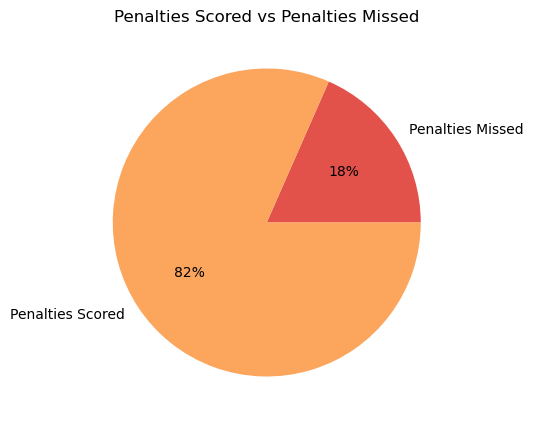

In [12]:
#plotting a pie graph for visualizing the relationship between penalties attempted and scored

plt.figure(figsize =(6, 5))
plt.title('Penalties Scored vs Penalties Missed')
data= [tot_pen_missed, tot_pen_scored]
color = sns.color_palette('Spectral')
labels = ['Penalties Missed', 'Penalties Scored']
plt.pie(data, autopct = '%.0f%%', labels= labels, colors = color )
plt.show()

Insight:
    This season had one of the best penalty conversion rates

Question 2: Show the top 10 countries represented by the players in the league

In [13]:
df_epl['Nationality'].unique()

#This is giving us an array.

array(['ENG', 'SEN', 'GER', 'ESP', 'FRA', 'ITA', 'BRA', 'CRO', 'USA',
       'DEN', 'MAR', 'SCO', 'ARG', 'POR', 'BEL', 'ALG', 'UKR', 'NED',
       'SWE', 'URU', 'SRB', 'WAL', 'CIV', 'NGA', 'EGY', 'TUR', 'CMR',
       'GUI', 'SUI', 'JPN', 'IRL', 'GRE', 'NIR', 'GHA', 'AUT', 'JAM',
       'RSA', 'CZE', 'POL', 'PAR', 'COD', 'KOR', 'COL', 'GAB', 'NOR',
       'AUS', 'BIH', 'ISL', 'MKD', 'BFA', 'ZIM', 'SVK', 'MEX', 'CAN',
       'MLI', 'IRN', 'NZL', 'MTN', 'SKN'], dtype=object)

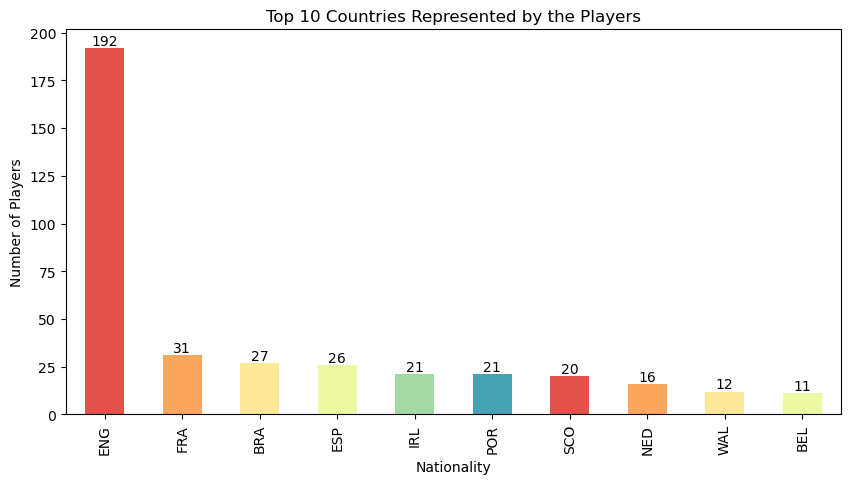

In [14]:
np.size(df_epl['Nationality'].unique()) #np.size gives us a number instead of an array

top_10_countries = df_epl['Nationality'].value_counts()
top_10_countries

plt.title('Top 10 Countries Represented by the Players')
plt.ylabel('Number of Players')

ax = top_10_countries.head(10).plot(kind='bar', figsize=(10,5), color = sns.color_palette("Spectral"))

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

Question 3: Plot a graph of the players based on their age groups

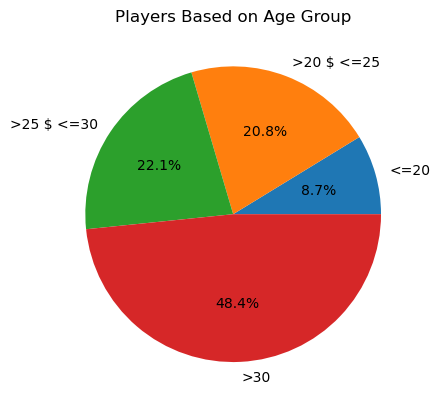

In [15]:
#differentiating the players based on their age group

Under_20 = df_epl[df_epl['Age'] <=20]
Age_20_to_25 = df_epl[(df_epl['Age'] > 20) & (df_epl['Age'] <= 25)]
Age_25_to_30 = df_epl[(df_epl['Age'] > 25) & (df_epl['Age'] <= 30)]
Age_30 = df_epl[df_epl['Age'] <30]

agewise_players = np.array([Under_20['Name'].count(), Age_20_to_25['Name'].count(), Age_25_to_30['Name'].count(), Age_30['Name'].count()])

labels  = ['<=20', '>20 $ <=25', '>25 $ <=30', '>30']
plt.title('Players Based on Age Group')
plt.pie(agewise_players, labels=labels, autopct = '%.1f%%')
plt.show()

Distribution of players age

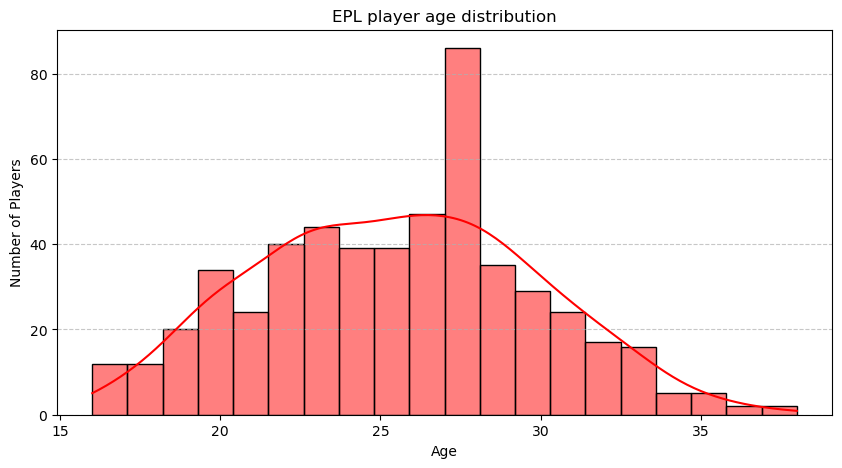

In [16]:
plt.figure(figsize= (10,5))
sns.histplot(data= df_epl['Age'], bins=20, kde=True, color='red', edgecolor='black')
plt.title('EPL player age distribution')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

Finding Total number of youngster in each club

Text(0, 0.5, 'Youngsters')

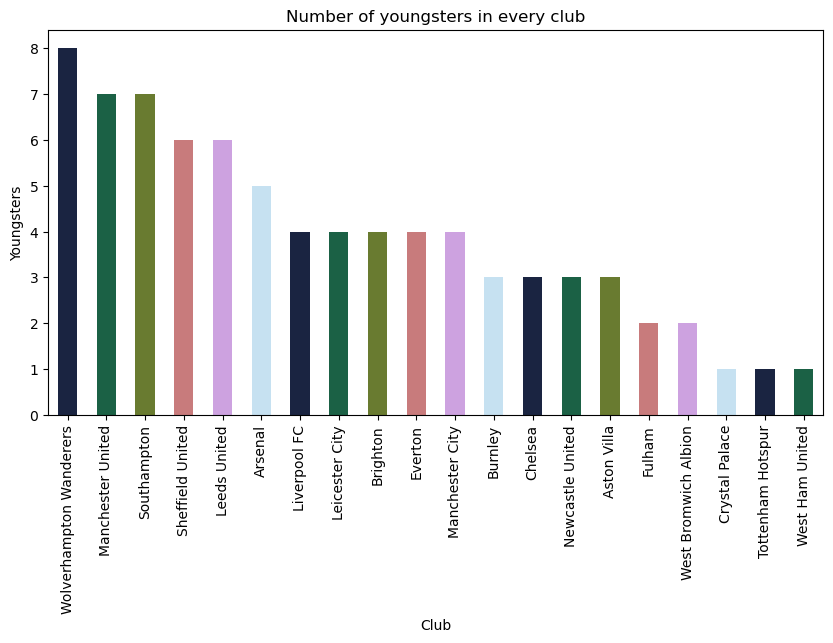

In [17]:
Under_20 = df_epl[df_epl['Age'] <=20]
Under_20['Club'].value_counts().plot(kind = 'bar', figsize=(10,5), color = sns.color_palette('cubehelix'))
plt.title('Number of youngsters in every club')
plt.ylabel('Youngsters')

Total Under 20 Plyers in a specific club

In [18]:
# Under 20 players in Leeds United

U20_Leeds = Under_20[Under_20['Club'] == 'Leeds United']
U20_Leeds

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_Played_Per_Match,Goals_Per_Match,Penalties_Missed
215,Illan Meslier,Leeds United,FRA,GK,20,35,35,3150,0,0,...,80.9,0,0,0.00,0.00,0,0,90,0.000000,0
222,Pascal Struijk,Leeds United,NED,DF,20,27,22,2075,1,0,...,87.1,0,0,0.10,0.01,3,0,76,0.037037,0
228,Jamie Shackleton,Leeds United,ENG,MF,20,13,3,461,0,0,...,88.3,0,0,0.00,0.05,0,0,35,0.000000,0
232,Ian Carlo Poveda,Leeds United,ENG,MF,20,14,0,355,0,0,...,73.5,0,0,0.09,0.21,0,0,25,0.000000,0
233,Niall Huggins,Leeds United,WAL,DF,19,1,0,38,0,0,...,73.9,0,0,0.00,0.00,0,0,38,0.000000,0
234,Leif Davis,Leeds United,ENG,DF,20,2,0,33,0,0,...,84.2,0,0,0.00,0.00,0,0,16,0.000000,0


Average age of players in each club

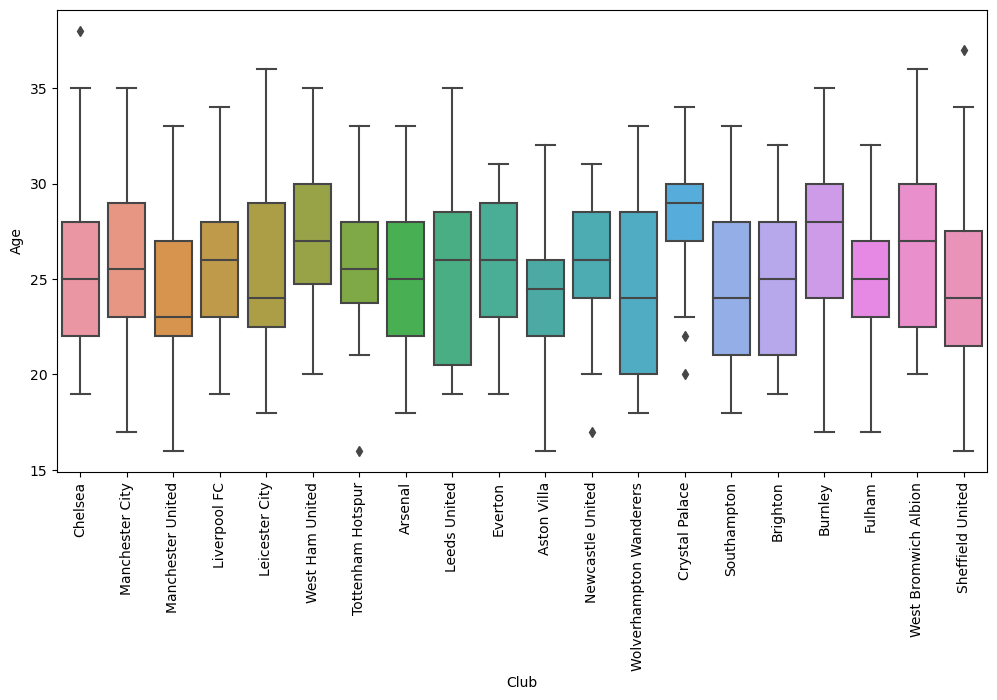

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data= df_epl, x= 'Club', y='Age')
plt.xticks(rotation =90)
plt.show()

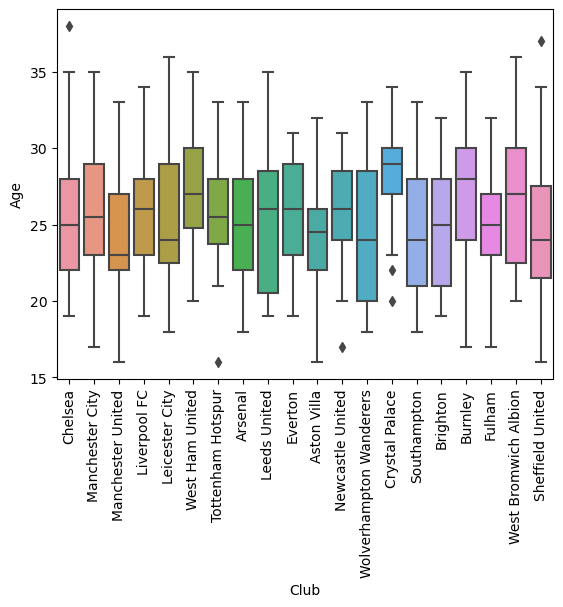

In [20]:
sns.boxplot(data= df_epl, x= 'Club', y='Age')
plt.xlabel('Club')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()


Outliers

In [21]:
df_epl[(df_epl['Club'] == 'Chelsea') & (df_epl['Age'] > 35)]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_Played_Per_Match,Goals_Per_Match,Penalties_Missed
22,Willy Caballero,Chelsea,ARG,GK,38,1,1,90,0,0,...,92.3,0,0,0.0,0.0,0,0,90,0.0,0


In [22]:
num_player = df_epl.groupby('Club')['Age'].mean()
num_player.sort_values(ascending=False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
Name: Age, dtype: float64

Total assists from each club

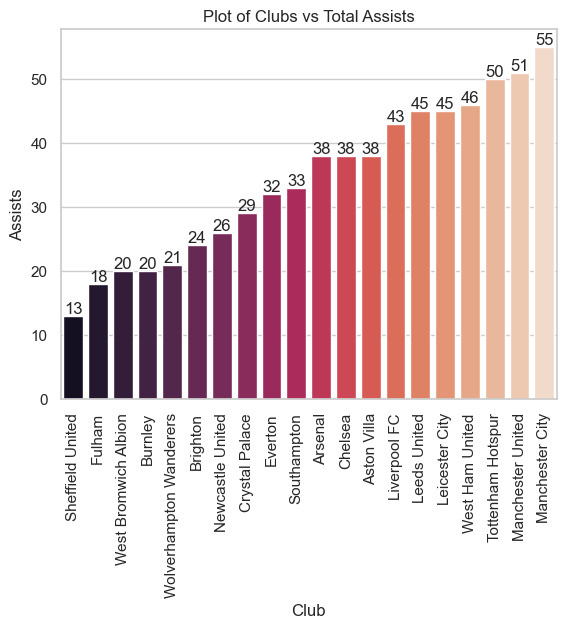

In [23]:
assists_by_clubs = pd.DataFrame(df_epl.groupby('Club', as_index=False)['Assists'].sum())
sns.set_theme(style= 'whitegrid', color_codes = True)
ax = sns.barplot(x = 'Club', y='Assists', data=assists_by_clubs.sort_values(by="Assists"), palette='rocket')
ax.set_xlabel('Club')
ax.set_ylabel('Assists')
plt.xticks(rotation=90)
plt.title('Plot of Clubs vs Total Assists')

for bar in ax.containers:
    ax.bar_label(bar)
    
plt.show()


Top 10 Assists

In [24]:
top_10_assists = df_epl[['Name', 'Club', 'Assists', 'Matches']].nlargest(n=10, columns='Assists')
top_10_assists

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


Question 4: Find the total number of assists provided by each club

<function matplotlib.pyplot.show(close=None, block=None)>

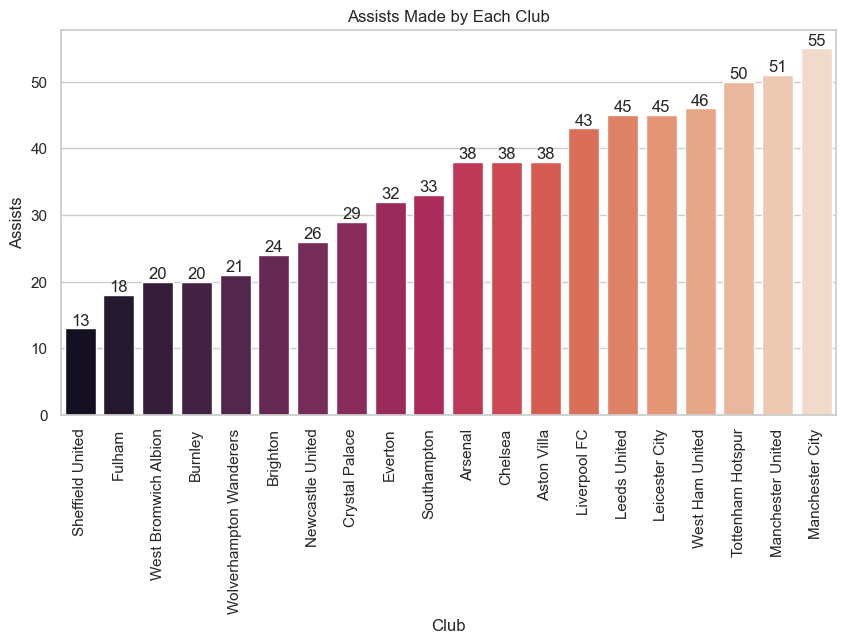

In [25]:
assists_by_club = pd.DataFrame(df_epl.groupby('Club', as_index = False)['Assists'].sum())
plt.figure(figsize =(10, 5))
plt.title('Assists Made by Each Club')
ax = sns.barplot(x= 'Club', y= 'Assists', data= assists_by_club.sort_values('Assists'), palette = 'rocket')
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show
    

Question 5:Find the total number of goals scored by each club

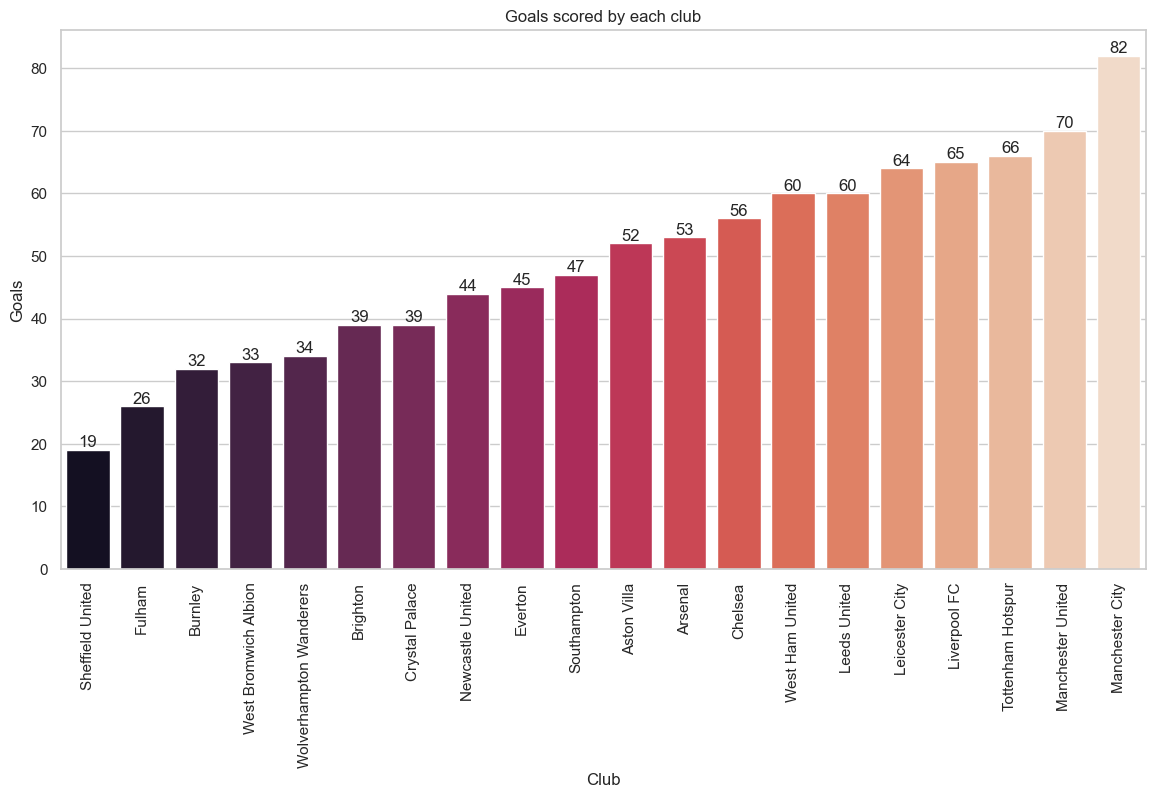

In [26]:
Goals_By_Club = pd.DataFrame(df_epl.groupby('Club', as_index = False)['Goals'].sum())
plt.figure(figsize = (14,7))
plt.title('Goals scored by each club')
ax = sns.barplot(x= 'Club', y= 'Goals', data= Goals_By_Club.sort_values('Goals'), palette= 'rocket')
plt.xticks(rotation=90)

for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

Q6. Is there a correlation between penalties awarded and the number of goals a player scores?

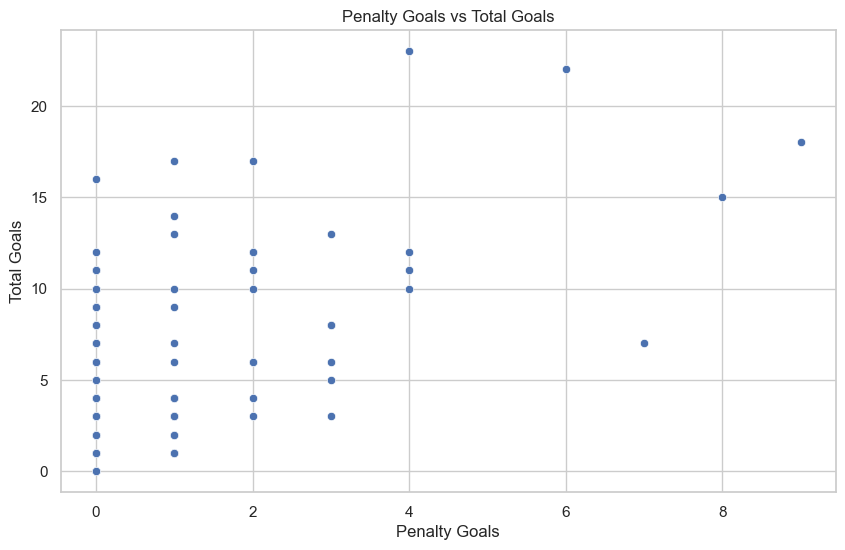

In [27]:
plt.figure(figsize =(10,6))
sns.scatterplot(data = df_epl, x='Penalty_Goals', y = 'Goals')
plt.title('Penalty Goals vs Total Goals')
plt.xlabel('Penalty Goals')
plt.ylabel('Total Goals')
plt.show()

In [28]:
correlation = df_epl['Penalty_Goals'].corr(df_epl['Goals'])
print(f'Correlation between Penalty Goals and Total Goals: {correlation:.2f}')

Correlation between Penalty Goals and Total Goals: 0.59


* A correlation coefficient of 0.59 suggests a moderate positigve correlation between the number of penalty goals scored and the number of total goals scored by players.

* A positive correlation means that as the number fo penalty goals scored by a player increases, there is a tendency for the player to also score more total goals.

P.S Note:

It doesn't necessarily mean that scoring more penalty goals directly causes players to score more total goals. Other factors and variables may also contribute to a player's total goal-scoring performance.

Q7. Which club attempted the most penalties?

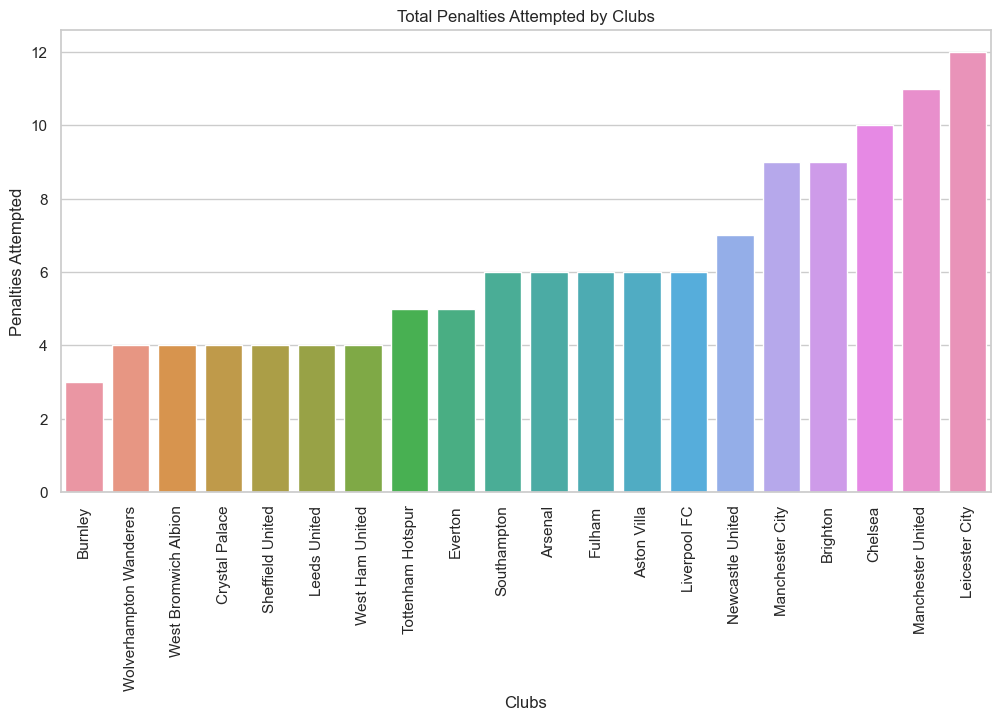

In [29]:
penalties_attempted_by_club = df_epl.groupby('Club')['Penalty_Attempted'].sum().sort_values().reset_index()
penalties_attempted_by_club.column = ['Club', 'Penalties_Attempted']
penalties_attempted_by_club

plt.figure(figsize = (12, 6))
sns.barplot(data = penalties_attempted_by_club, x = 'Club', y = 'Penalty_Attempted')
plt.title('Total Penalties Attempted by Clubs')
plt.xticks(rotation=90)
plt.xlabel('Clubs')
plt.ylabel('Penalties Attempted')
plt.show()

plt.show()

* Leicester City was awarded most penalty kicks in the 20-21 season, leading the chart with 12 attempted penalties. 

* On the other hand, Burnley only attempted 3 penalty kicks in the season. 

Positional Insights

Q1. Total Positions in EPL

In [30]:
df_epl['Position'].unique()

array(['MF', 'GK', 'FW', 'DF'], dtype=object)

In [31]:
#Total forwards in EPL

df_epl[df_epl['Position'] == 'FW'].value_counts().sum()

134

Q2. Which is the most common position in EPL

In [32]:
most_common_position = df_epl['Position'].value_counts().idxmax()
max_position_count = df_epl['Position'].value_counts().max()

print('The position with the most players is', most_common_position, 'with', max_position_count,'players')

The position with the most players is DF with 199 players


In [33]:
# Alternative method:

position_df = df_epl.explode('Position')

position_counts = position_df['Position'].value_counts()

most_common_position = position_counts.idxmax()
most_common_count = position_counts.max()

print(f"The position with the most players is {most_common_position} with {most_common_count} players.")

The position with the most players is DF with 199 players.


Q3. Do certain positions tend to score more goals than others?

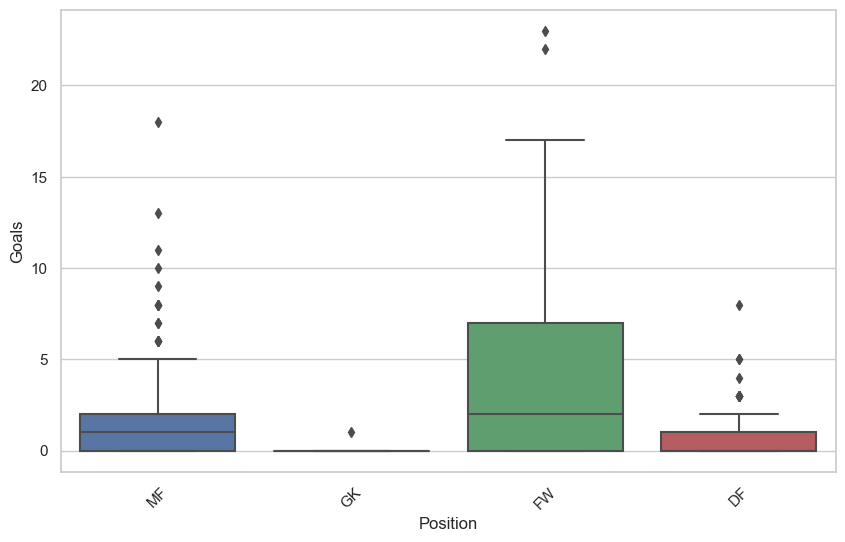

In [34]:
plt.figure(figsize =(10, 6))
sns.boxplot(data = df_epl, x = 'Position', y = 'Goals')
plt.xlabel('Position')
plt.ylabel('Goals')
plt.xticks(rotation = 45)
plt.show()

Goals per MAtch

In [35]:
df_epl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_Played_Per_Match,Goals_Per_Match,Penalties_Missed
0,Mason Mount,Chelsea,ENG,MF,21,36,32,2890,6,5,...,82.3,1,1,0.21,0.24,2,0,80,0.166667,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,...,84.6,0,0,0.00,0.00,2,0,88,0.000000,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,...,77.2,0,0,0.41,0.21,2,0,74,0.171429,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,...,78.6,0,0,0.10,0.11,3,0,84,0.111111,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,...,85.0,0,0,0.06,0.12,3,0,74,0.031250,0


In [36]:
top_10_goals_per_match = df_epl[['Name', 'Club', 'Matches', 'Goals', 'Goals_Per_Match']].nlargest(n=10, columns='Goals_Per_Match')
top_10_goals_per_match

,Name,Club,Matches,Goals,Goals_Per_Match
162,Harry Kane,Tottenham Hotspur,35,23,0.657143
81,Mohamed Salah,Liverpool FC,37,22,0.594595
307,Joe Willock,Newcastle United,14,8,0.571429
145,Jesse Lingard,West Ham United,16,9,0.562500
175,Gareth Bale,Tottenham Hotspur,20,11,0.550000
74,Anthony Elanga,Manchester United,2,1,0.500000
51,Bruno Fernandes,Manchester United,37,18,0.486486
237,Dominic Calvert-Lewin,Everton,33,16,0.484848
120,Kelechi Iheanacho,Leicester City,25,12,0.480000
92,Diogo Jota,Liverpool FC,19,9,0.473684


Goals with Assist, and without assist

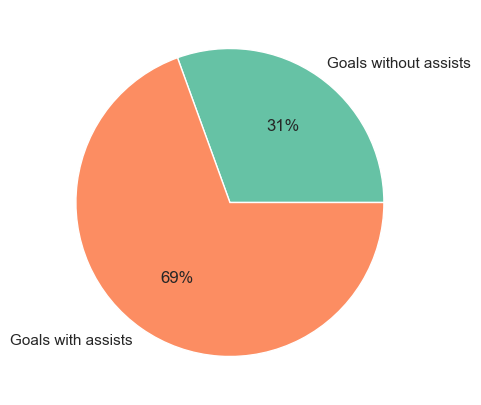

In [37]:
plt.figure(figsize=(10,5))
total_assists = df_epl['Assists'].sum()
total_goals= df_epl['Goals'].sum()
data = [total_goals - total_assists, total_assists]
labels = ['Goals without assists', 'Goals with assists']
color = sns.color_palette('Set2')
plt.pie(data, labels=labels, colors = color, autopct = '%.0f%%')
plt.show()

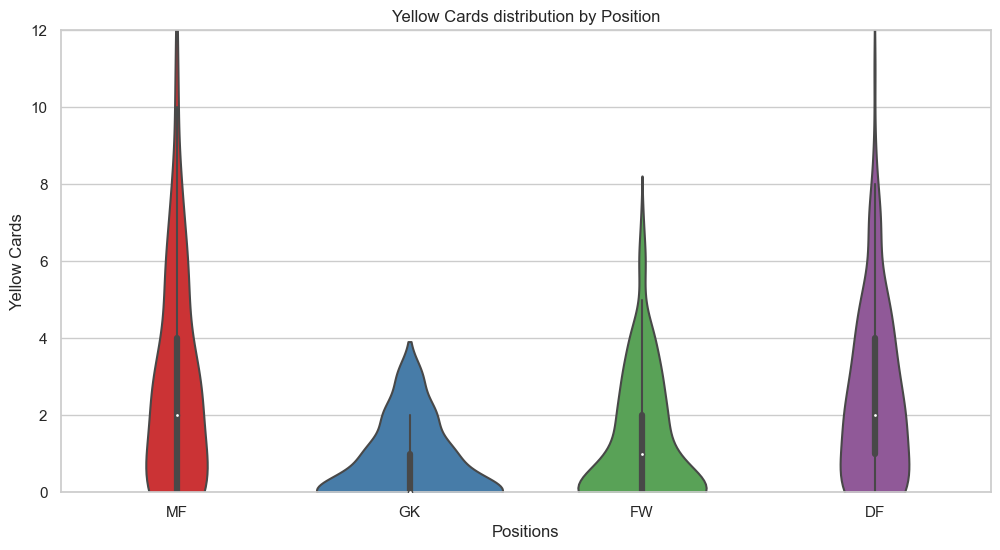

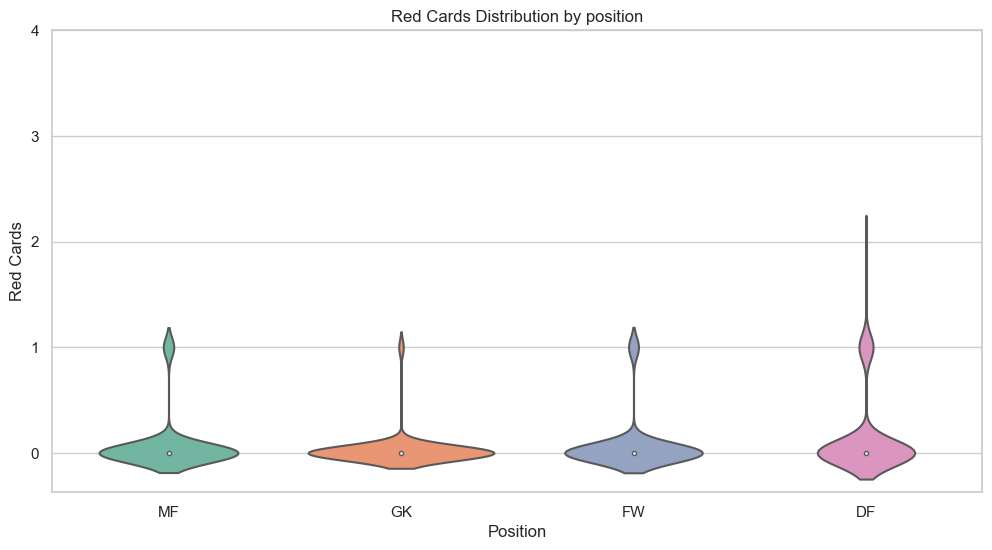

In [38]:
# Finding out disciplinary stats

disciplinary_stats = df_epl.groupby('Position')[['Yellow_Cards','Red_Cards']].mean()
#disciplinary_stats
plt.figure(figsize= (12,6))
sns.violinplot(data= df_epl, x= 'Position', y = 'Yellow_Cards', palette = 'Set1')
plt.title('Yellow Cards distribution by Position')
plt.xlabel('Positions')
plt.ylabel('Yellow Cards')
plt.ylim(0, df_epl['Yellow_Cards'].max())
plt.show()

plt.figure(figsize= (12,6))
sns.violinplot(data= df_epl, x= 'Position', y = 'Red_Cards', palette = 'Set2')
plt.title('Red Cards Distribution by position')
plt.xlabel('Position')
plt.ylabel('Red Cards')
plt.yticks([0, 1, 2, 3, 4])
plt.show()

* Yellow Cards:
              - The position MF and DF tend to have the highest average number of yellow cards. This is indicated by the taller and wider positions of the violin plots for these positions.
              - Positions like FW, and GK rake in lower average yellow cards, suggested by the narrower parts of the violin plots.
              

* Red Cards: 
             - The distribution of red cards appears to be less common across all positions, indicated by the thinner and shorter violin plots compared to yellow cards.
             - MF and MF still tend to have slightly higher average number of red cards, but this is relatively low overall. 

In [39]:
#teams with most bookings

most_cards = df_epl.groupby('Club').agg({'Yellow_Cards':'sum', 'Red_Cards':'sum'}).sort_values(by='Yellow_Cards', ascending= False)
most_cards.head()

,Yellow_Cards,Red_Cards
Club,,
Sheffield United,73,3
Aston Villa,71,4
Fulham,67,3
Newcastle United,65,3
Manchester United,64,1


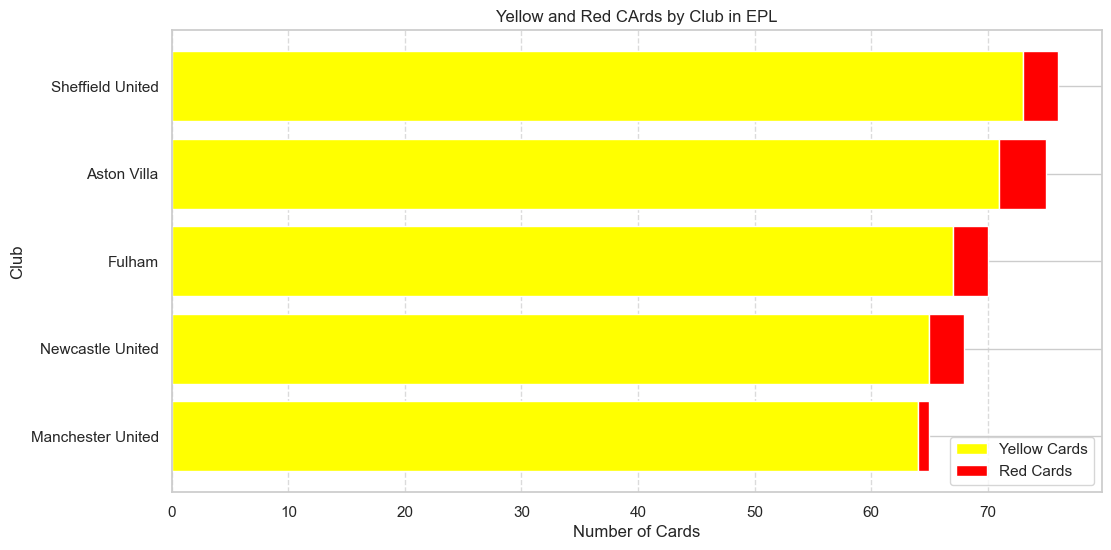

In [40]:
top_N = 5
top_cards_df = most_cards.head(top_N)

# Create the bar plot

plt.figure(figsize = (12, 6))
plt.barh(top_cards_df.index, top_cards_df['Yellow_Cards'], color = 'yellow', label = 'Yellow Cards')
plt.barh(top_cards_df.index, top_cards_df['Red_Cards'], color= 'red', label='Red Cards', left = top_cards_df['Yellow_Cards'])
plt.xlabel('Number of Cards')
plt.ylabel('Club')
plt.title('Yellow and Red CArds by Club in EPL')
plt.legend()
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha = 0.7)
plt.show()

Top 10 players with the most yellow cards

Text(0.5, 1.0, 'Players with the most yellow cards')

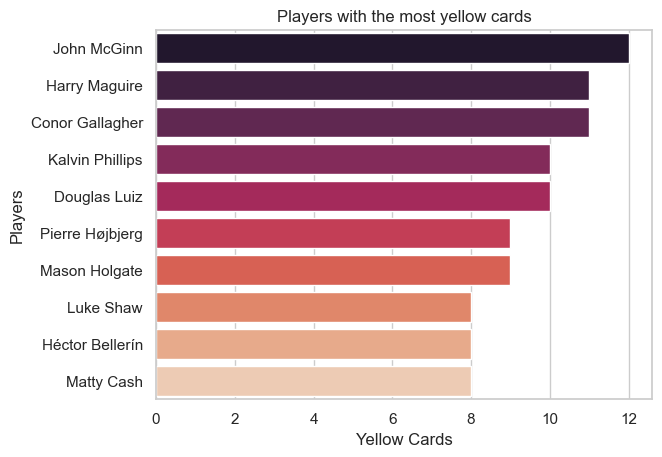

In [41]:
top10_booked = df_epl[['Name', 'Club', 'Position', 'Yellow_Cards']].nlargest(n=10, columns='Yellow_Cards')

top10_booked
sns.barplot(data=top10_booked, x = 'Yellow_Cards', y= 'Name', palette='rocket')
plt.xlabel('Yellow Cards')
plt.ylabel('Players')
plt.title('Players with the most yellow cards')

Q4. What is the average age of players according to their position?

In [42]:
position_age_summary = df_epl.groupby('Position')['Age'].mean()
position_age_summary 

Position
DF    25.713568
FW    24.858209
GK    28.190476
MF    25.057325
Name: Age, dtype: float64

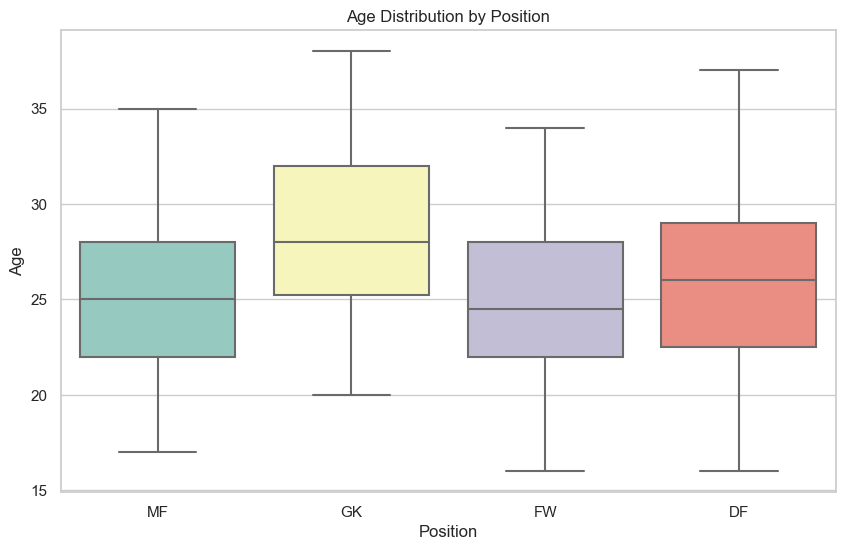

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_epl, x= 'Position', y= 'Age', palette = 'Set3')
plt.title('Age Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Age')
plt.show()

The box plot shows that positions like GK tend to have older players on average compared to other positions, while positions like FW have a wider range of ages with someyounger players.

Club Comparison

Clubs with maximum and minimum players in the squad

In [44]:
# Clubs with max players

top_5_large_squads = df_epl['Club'].value_counts().nlargest(5)
top_5_large_squads

Club
West Bromwich Albion    30
Manchester United       29
Arsenal                 29
Southampton             29
Everton                 29
Name: count, dtype: int64

<Axes: title={'center': 'Top 5 Clubs with most players in their squad'}, ylabel='Club'>

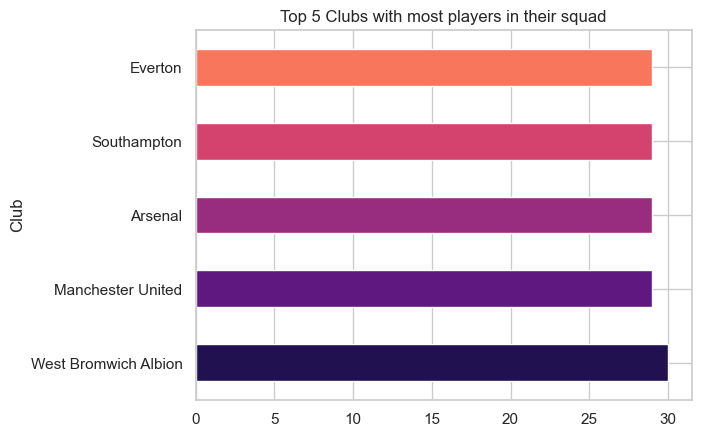

In [45]:
top_5_large_squads.plot(kind= 'barh', color=sns.color_palette('magma'), title = 'Top 5 Clubs with most players in their squad')

Clubs with the smallest squad

In [46]:
bottom_5 = df_epl['Club'].value_counts().nsmallest()
bottom_5

Club
Leeds United         23
Manchester City      24
Crystal Palace       24
Tottenham Hotspur    24
West Ham United      24
Name: count, dtype: int64

<Axes: title={'center': 'Top 5 clubs with the smallest squad'}, ylabel='Club'>

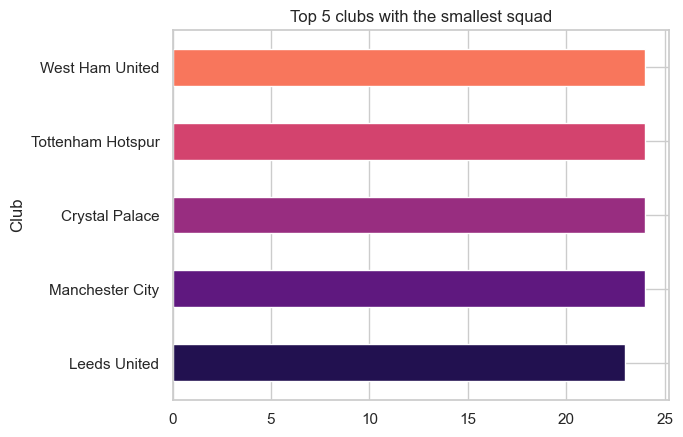

In [47]:
bottom_5.plot(kind='barh', color= sns.color_palette('magma'), title = 'Top 5 clubs with the smallest squad')

Average Pass Completion Rate by Nationality

In [48]:
pivot_table_nationality = df_epl.pivot_table(values= 'Perc_Passes_Completed', index= 'Nationality', aggfunc='mean')

sorted_pivot_table_nationality = pivot_table_nationality.sort_values(by ='Perc_Passes_Completed', ascending=False )
sorted_pivot_table_nationality.head()

,Perc_Passes_Completed
Nationality,
CAN,100.00
CRO,87.70
GUI,87.40
COL,87.06
CMR,86.65


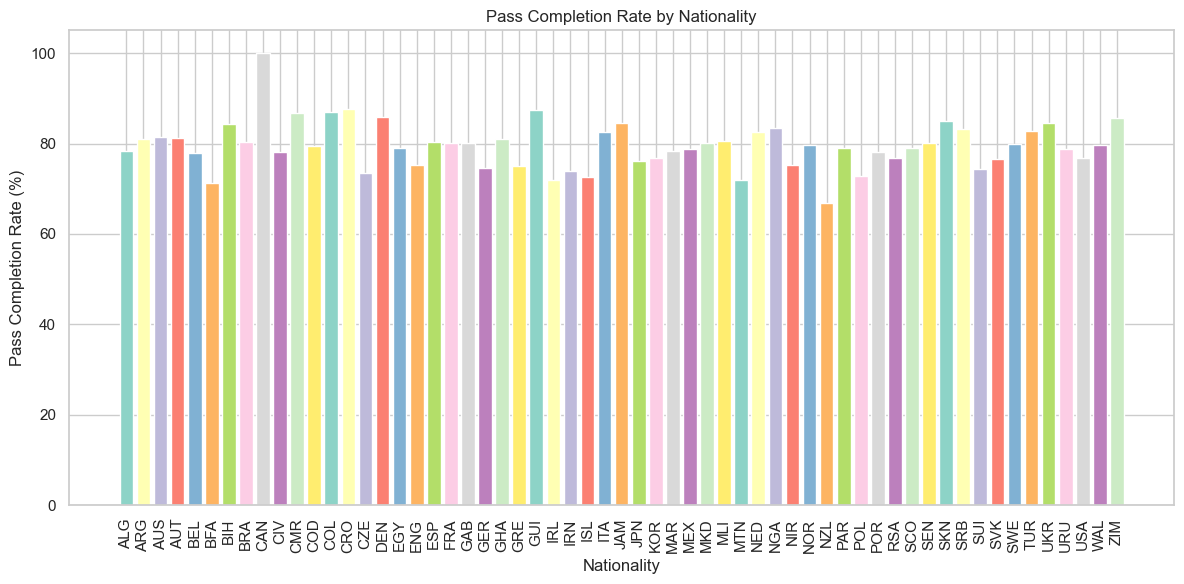

In [49]:
plt.figure(figsize=(12,6))
color = sns.color_palette('Set3')
plt.bar(pivot_table_nationality.index, pivot_table_nationality['Perc_Passes_Completed'], color=color)
plt.xlabel('Nationality')
plt.ylabel('Pass Completion Rate (%)')
plt.title('Pass Completion Rate by Nationality')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Are there any notable correlations between the numeric variables(e.g age, goals, assists, yellow cards, passes attempted)?

In [50]:
# Calculating the Correlation Matrix:

numeric_columns = df_epl.select_dtypes(include=['float64','int64'])

correlation_matrix = numeric_columns.corr()
correlation_matrix

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Goals_Per_Match,Penalties_Missed
Age,1.000000,0.149628,0.156387,0.158643,0.047022,0.026740,0.120244,0.122812,0.084547,0.083328,-0.056098,-0.047849,0.115191,0.065414,0.025032,0.044087
Matches,0.149628,1.000000,0.938116,0.947351,0.441977,0.508009,0.785362,0.085462,0.227929,0.234389,0.192047,0.227570,0.578093,0.168281,0.316723,0.163581
Starts,0.156387,0.938116,1.000000,0.997031,0.405381,0.477704,0.853448,0.086039,0.216877,0.221418,0.072487,0.113446,0.603497,0.195383,0.279281,0.148278
Mins,0.158643,0.947351,0.997031,1.000000,0.400398,0.474677,0.855600,0.085460,0.219027,0.224115,0.075016,0.117602,0.604634,0.193038,0.272124,0.152049
Goals,0.047022,0.441977,0.405381,0.400398,1.000000,0.617831,0.201526,-0.025137,0.594730,0.590492,0.681959,0.348428,0.104413,0.057785,0.917432,0.330014
Assists,0.026740,0.508009,0.477704,0.474677,0.617831,1.000000,0.393906,-0.016645,0.408459,0.411784,0.383358,0.558677,0.213691,-0.020855,0.499182,0.255272
Passes_Attempted,0.120244,0.785362,0.853448,0.855600,0.201526,0.393906,1.000000,0.228393,0.149533,0.157020,-0.092535,0.105132,0.634567,0.208003,0.099542,0.122227
Perc_Passes_Completed,0.122812,0.085462,0.086039,0.085460,-0.025137,-0.016645,0.228393,1.000000,-0.024517,-0.014934,-0.035313,0.047720,0.162451,0.054068,-0.019574,0.029578
Penalty_Goals,0.084547,0.227929,0.216877,0.219027,0.594730,0.408459,0.149533,-0.024517,1.000000,0.982176,0.407251,0.205417,0.057846,0.021109,0.497733,0.505797
Penalty_Attempted,0.083328,0.234389,0.221418,0.224115,0.590492,0.411784,0.157020,-0.014934,0.982176,1.000000,0.420159,0.218949,0.063506,0.031073,0.508103,0.658930


Visualizing the Correlation Matrix as a Heatmap

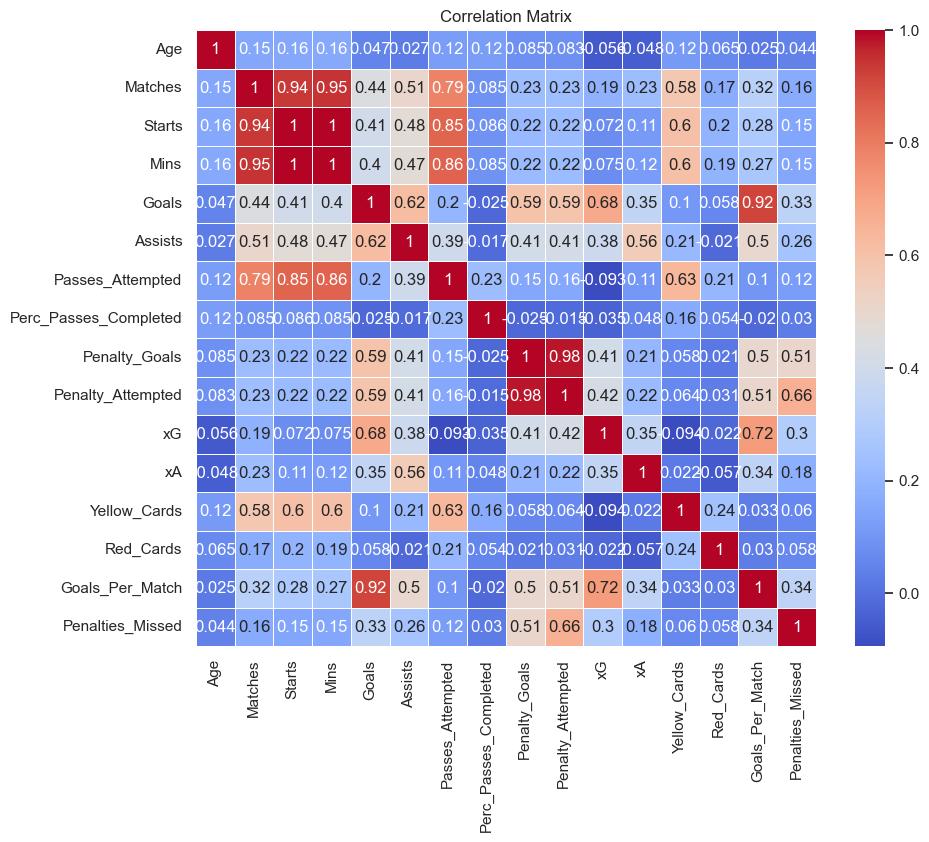

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

Interpreting the Heatmap

---Age has a weak positive correlation with various performance metrics such as goals, assists, and passes attempted, indicating that older players tend to have slightly better performance in these aspects.

---The number of matches played and starts have strong positive correlations with each other, as well as with minutes played, suggesting that players who start more matches tend to play more minutes.

---Goals have a strong positive correlation with assists, indicating that players who score more goals also tend to provide more assists.

---There is a strong positive correlation between goals and goals per match, suggesting that players who score more goals tend to have a higher average goals per match.

---Passes attempted have a moderate positive correlation with matches played and starts, indicating that players who are more active in matches tend to attempt more passes.

---Penalty goals and penalty attempts have a very high positive correlation, indicating that players who attempt penalties are likely to convert a significant portion of them into goals.

---There is a strong positive correlation between expected goals (xG) and goals, suggesting that players who score more actual goals tend to have higher expected goal values.

---Expected assists (xA) have a moderate positive correlation with assists, indicating that players with higher expected assists tend to provide more actual assists.

---Yellow cards and red cards have a moderate positive correlation, suggesting that players who receive more yellow cards are also more likely to receive red cards.

How are the Expected Goals(xG) and Expected Assists(xA) distributed among the players in the dataset`

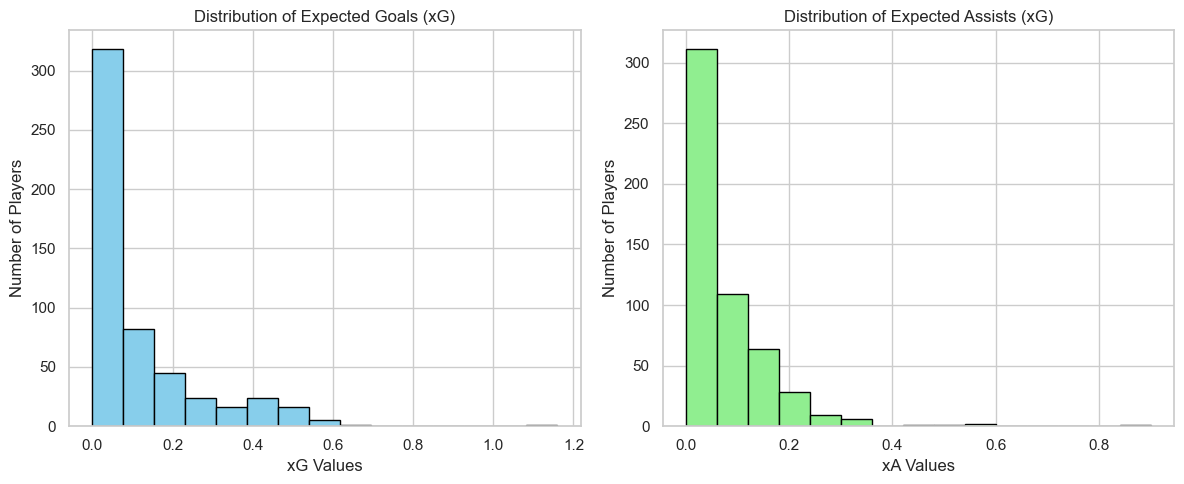

In [52]:
xG_column = df_epl['xG']
xA_column = df_epl['xA']

fig, axes = plt.subplots(nrows= 1, ncols =2, figsize = (12, 5))

axes[0].hist(xG_column, bins=15, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Expected Goals (xG)')
axes[0].set_xlabel('xG Values')
axes[0].set_ylabel('Number of Players')

axes[1].hist(xA_column, bins=15, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution of Expected Assists (xG)')
axes[1].set_xlabel('xA Values')
axes[1].set_ylabel('Number of Players')

plt.tight_layout()
plt.show()

Interpretation:

---In the histogram for xG, we see that the majority of players have relatively low xG values, indicating that they are less likely to score goals. There are a few players with higher xG values, suggesting that they are more likely to score.

---In the histogram for xA, we observe a similar pattern. Most players have low xA values, indicating a lower likelihood of providing assists. However, there are some players with higher xA values, suggesting a higher likelihood of creating goal-scoring opportunities for their teammates.

Conclusion:

---The distribution of Expected Goals (xG) and Expected Assists (xA) values among the players is right-skewed, with the majority of players having lower values.

---Players with higher xG values are more likely to score goals, while players with higher xA values are more likely to provide assists.

---These visualizations help in assessing the goal-scoring and playmaking capabilities of the players in the dataset and identifying potential key contributors in terms of generating scoring opportunities and goal-scoring likelihood.

How is the distribution of minutes played by players in the dataset

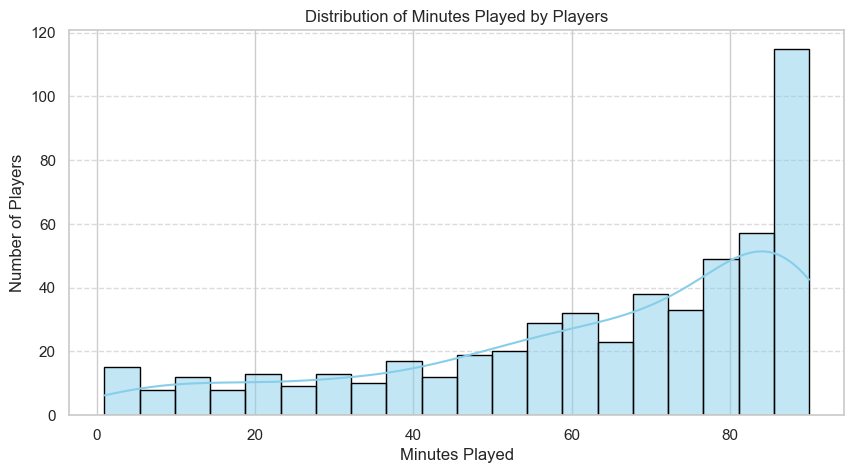

In [53]:
minutes_played_column = 'Mins_Played_Per_Match'
minutes_played_column 

plt.figure(figsize= (10,5))
sns.histplot(df_epl[minutes_played_column], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Minutes Played by Players')
plt.xlabel('Minutes Played')
plt.ylabel('Number of Players')
plt.grid(axis = 'y', linestyle='--', alpha=0.7)

plt.show()



Interpretation:¶
---The histogram of minutes played by players provides insights into the distribution of playing time.

---It shows that the majority of players have played a moderate amount of minutes, with a peak in the histogram indicating a common range of playing time.

---There are fewer players who have played very few minutes or a significant number of minutes, suggesting variations in playing time distribution.

Conclusion:
---The histogram helps in understanding player rotation patterns, as it shows the concentration of players within certain minute intervals.

---Coaches and team managers can use this information to make decisions regarding player rotation, substitutions, and managing player fitness throughout the season.


How does passing accuracy vary between different player positions

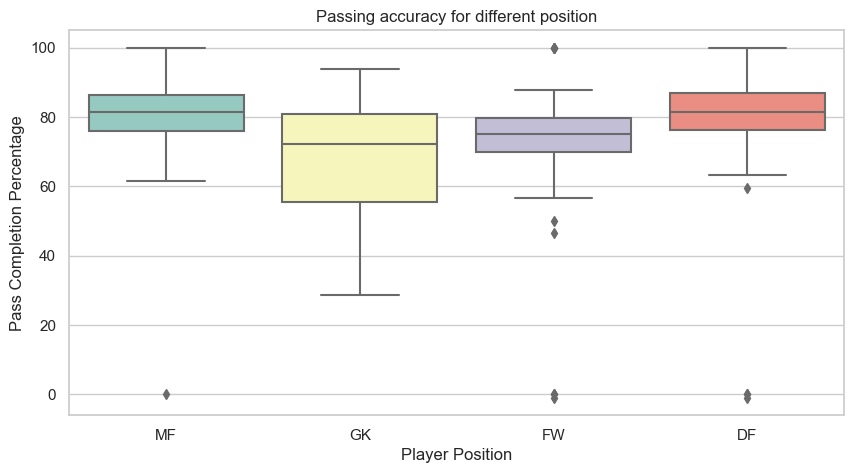

In [55]:
passing_accuracy_data = df_epl[['Position', 'Perc_Passes_Completed']]

plt.figure(figsize= (10,5))
plt.title('Passing accuracy for different position')
sns.boxplot(data=passing_accuracy_data, x= 'Position', y= 'Perc_Passes_Completed', palette= 'Set3')
plt.xlabel('Player Position')
plt.ylabel('Pass Completion Percentage')
plt.show()

Interpretation:
---MF and MF appear to have the highest median passing accuracy among all positions, as indicated by the horizontal line inside their boxes.

---GK also show high passing accuracy, with a relatively narrow spread of data points.

---FW, while having a wide range of passing accuracy, tend to have a median passing accuracy that falls between midfielders and defenders.

In [59]:
df_epl['Club'].value_counts()

Club
West Bromwich Albion       30
Manchester United          29
Arsenal                    29
Southampton                29
Everton                    29
Liverpool FC               28
Fulham                     28
Chelsea                    27
Newcastle United           27
Brighton                   27
Wolverhampton Wanderers    27
Sheffield United           27
Leicester City             27
Burnley                    25
Manchester City            24
Crystal Palace             24
Tottenham Hotspur          24
West Ham United            24
Aston Villa                24
Leeds United               23
Name: count, dtype: int64

Are there players known for their exceptional passing accuracy within the bix six??

<function matplotlib.pyplot.show(close=None, block=None)>

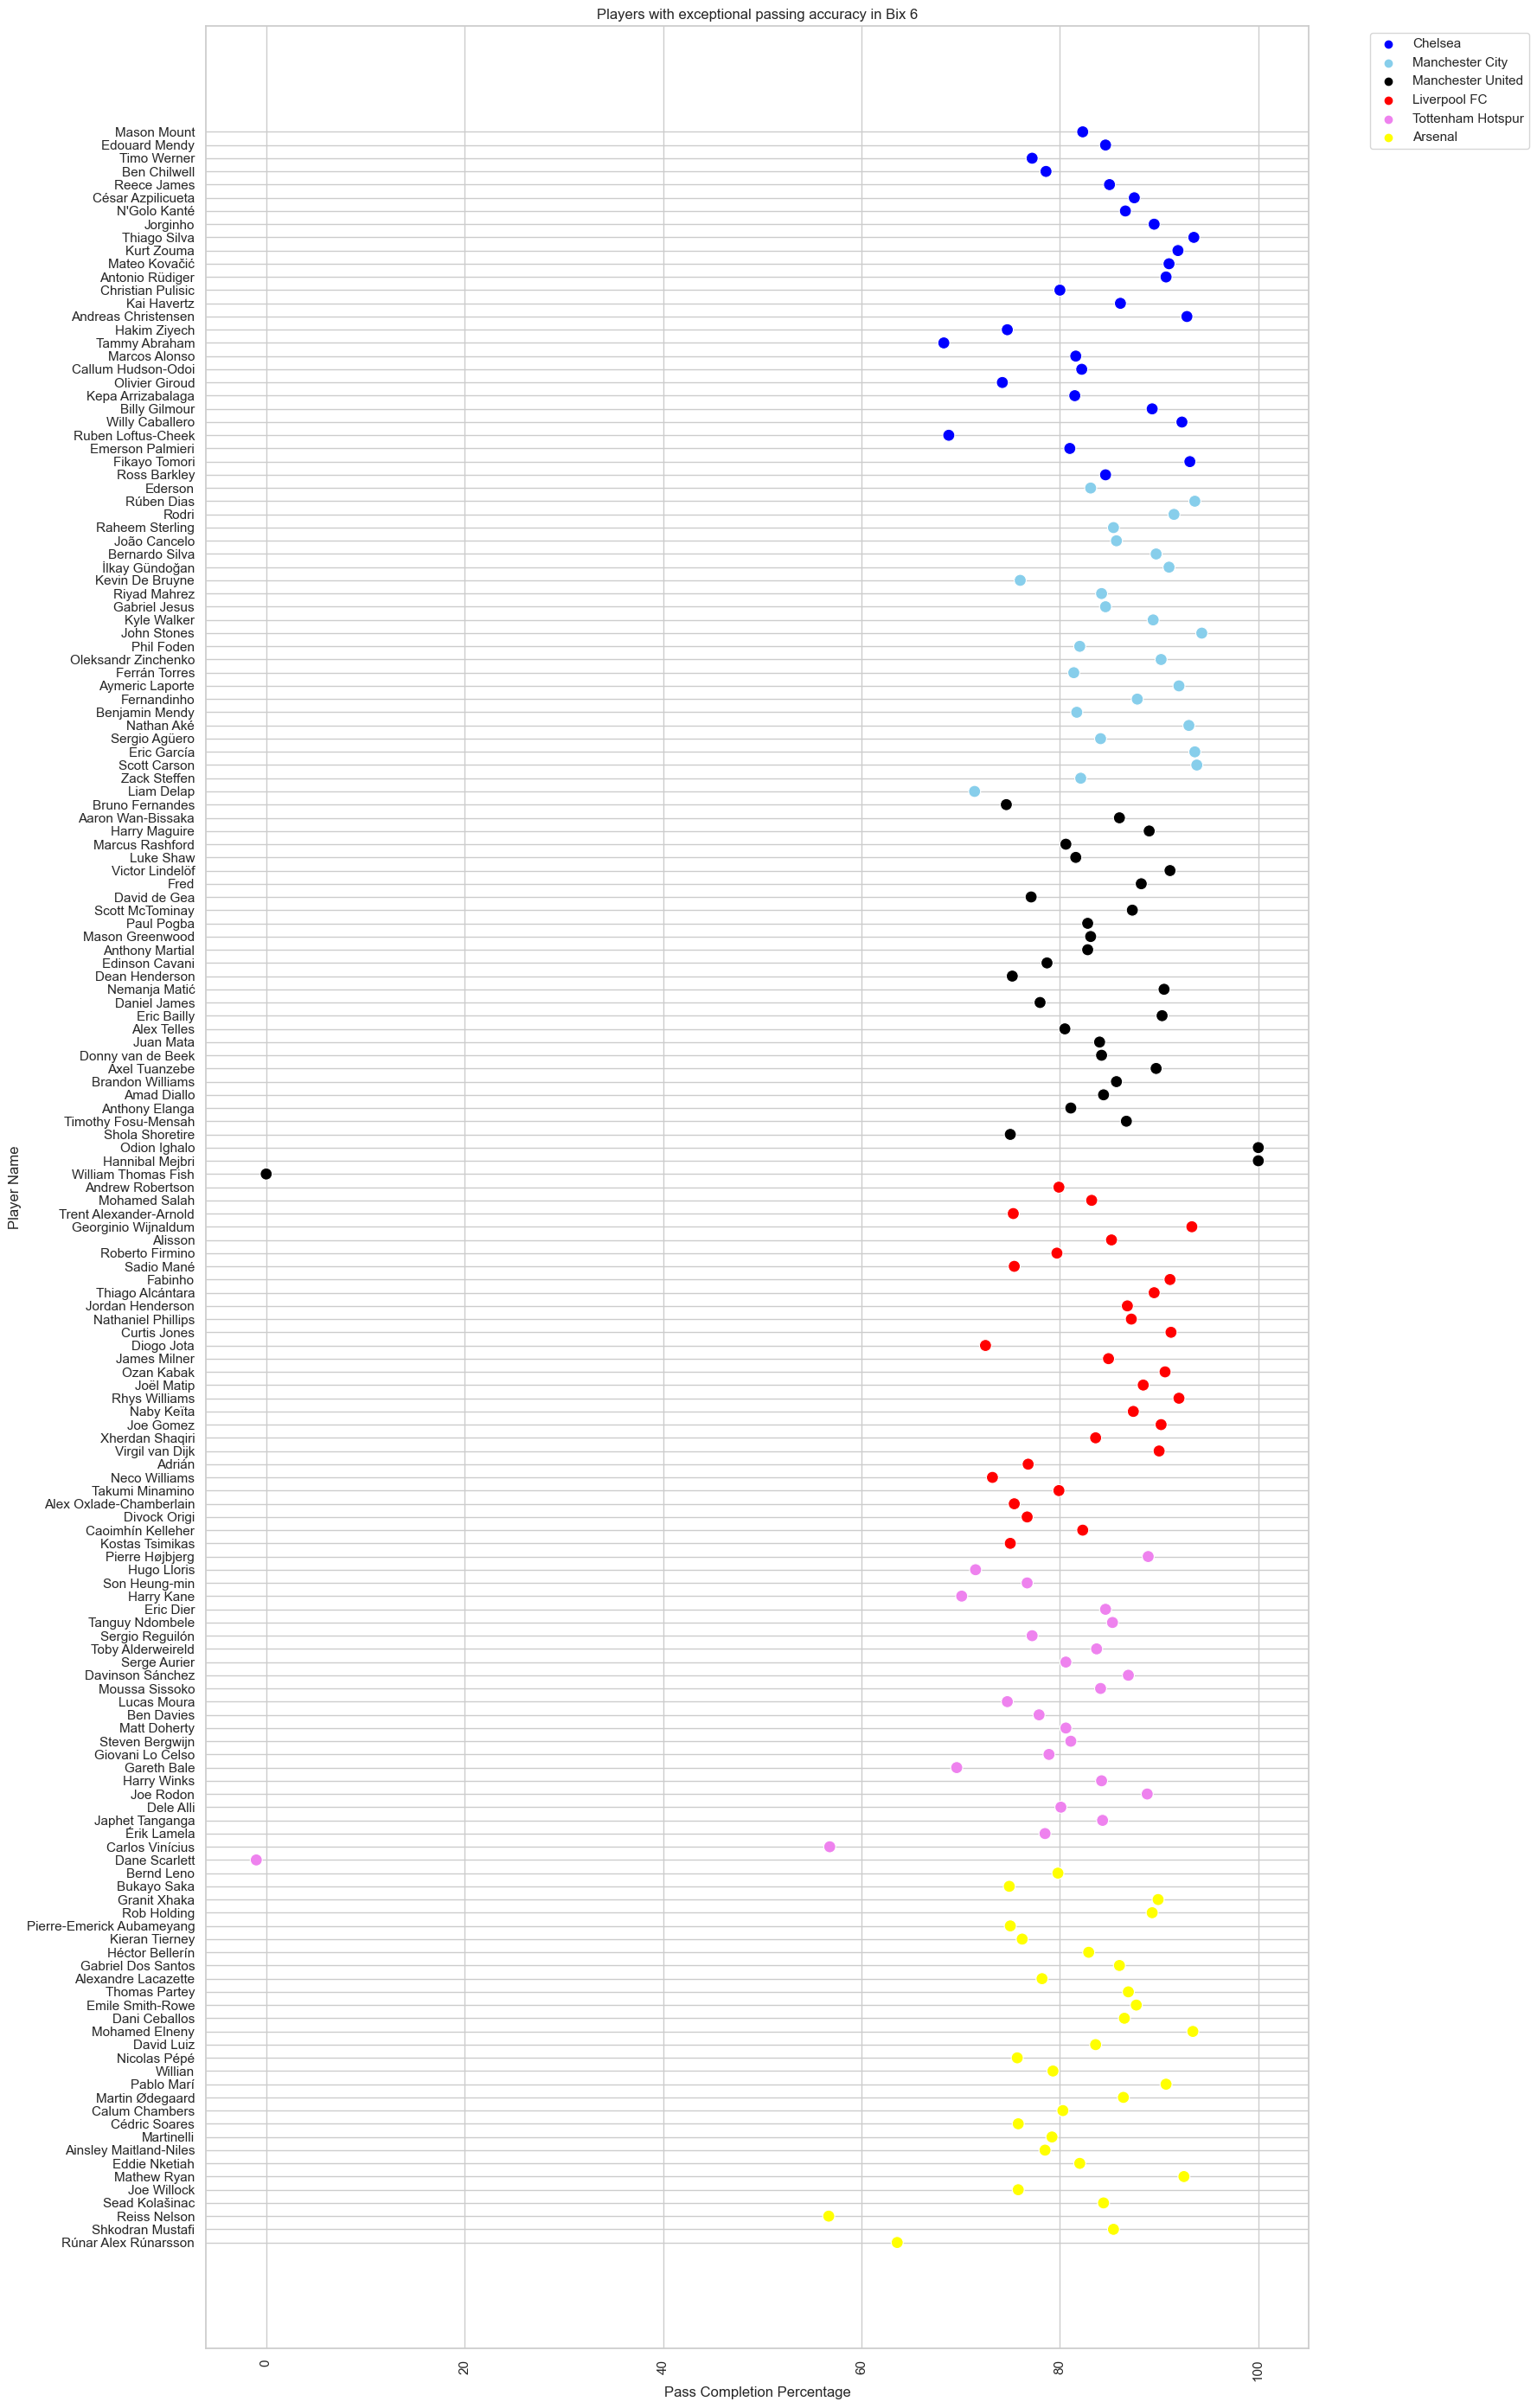

In [68]:
big_6 = ['Manchester City', 'Manchester United', 'Liverpool FC', 'Tottenham Hotspur','Arsenal','Chelsea']

filtered_passing_accuracy_df = df_epl[df_epl['Club'].isin(big_6)]

plt.figure(figsize=(18,28))
club_colors = {
    'Manchester City': 'skyblue',
    'Manchester United': 'black',
    'Liverpool FC': 'red',
    'Tottenham Hotspur': 'violet',
    'Arsenal': 'yellow',
    'Chelsea': 'blue'
}

sns.scatterplot(data = filtered_passing_accuracy_df, x = 'Perc_Passes_Completed', y= 'Name', hue = 'Club', palette=club_colors, s=100)
plt.title('Players with exceptional passing accuracy in Bix 6')
plt.xticks(rotation=90)
plt.xlabel('Pass Completion Percentage')
plt.ylabel('Player Name')
plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left')
plt.tight_layout()
plt.show

Passing Percentage by Club

In [74]:
average_pass_completion = df_epl['Perc_Passes_Completed'].mean()

df_epl.groupby('Club')['Perc_Passes_Completed'].mean().sort_values()


Club
Burnley                    67.456000
Brighton                   71.988889
West Bromwich Albion       72.383333
Southampton                72.955172
Sheffield United           74.037037
Crystal Palace             74.529167
Newcastle United           75.085185
Tottenham Hotspur          76.004167
West Ham United            76.495833
Aston Villa                76.795833
Leicester City             79.240741
Leeds United               79.382609
Everton                    79.520690
Arsenal                    81.262069
Wolverhampton Wanderers    81.318519
Manchester United          81.662069
Fulham                     81.710714
Liverpool FC               83.453571
Chelsea                    84.033333
Manchester City            86.733333
Name: Perc_Passes_Completed, dtype: float64

Due to Burnley's Direct passing approach, they have the least pass completion success rate in the league.

On the other hand, the tightly controlled possession-based tactic of Manchester City allows them to complete more succesful passes.

Which players have consistently outperformed their expected goals(xG) and assists(xA)>

In [76]:
df_epl['Goal_Diff'] = df_epl['Goals']  - df_epl['xG']
df_epl['Assist_Diff'] = df_epl['Assists'] - df_epl['xA']

# Find players who consistently outperformed their xG and xA
consistent_outperformers = df_epl[
    (df_epl['Goal_Diff'] > 0) & (df_epl['Assist_Diff'] > 0)
].sort_values(by = ['Goal_Diff', 'Assist_Diff'], ascending=False)

consistent_outperformers[['Name', 'Club', 'Goal_Diff', 'Assist_Diff']].head()

,Name,Club,Goal_Diff,Assist_Diff
162,Harry Kane,Tottenham Hotspur,22.40,13.78
81,Mohamed Salah,Liverpool FC,21.39,4.82
51,Bruno Fernandes,Manchester United,17.55,11.68
161,Son Heung-min,Tottenham Hotspur,16.70,9.74
214,Patrick Bamford,Leeds United,16.49,6.88


Are there clubs that consistently generate high xG but score fewer goals

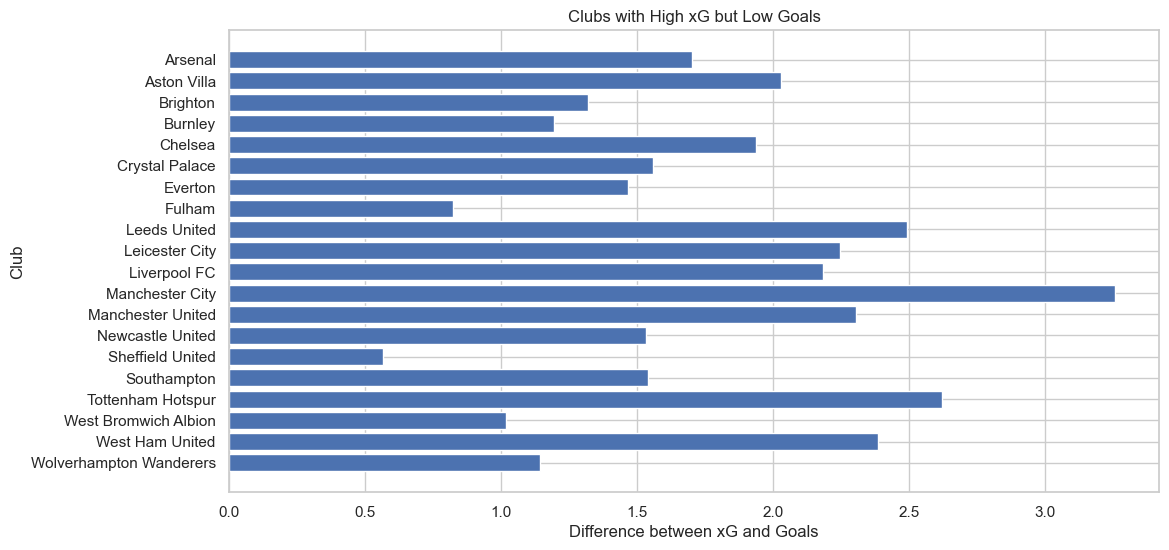

In [78]:
club_stats = df_epl.groupby('Club').agg({'xG': 'mean', 'Goals': 'mean' }).reset_index()

club_stats['xG_Goals_Difference'] = club_stats['Goals'] - club_stats['xG']

threshold = 0.1

clubs_high_xg_low_goals = club_stats[club_stats['xG_Goals_Difference'] > threshold]

plt.figure(figsize = (12,6))
plt.barh(clubs_high_xg_low_goals['Club'], clubs_high_xg_low_goals['xG_Goals_Difference'])
plt.xlabel('Difference between xG and Goals')
plt.ylabel('Club')
plt.title('Clubs with High xG but Low Goals')
plt.gca().invert_yaxis() 
plt.show()

It is evident that there is a significant difference between expected goals (xG) and actual goals scored for each Premier League club during a given period. The "xG_Goals_Difference" column represents this gap, indicating how much higher or lower the actual goal tally is compared to what was expected based on the quality of scoring opportunities created. Here are some key observations:

Overperforming Teams: Teams like Manchester City, Liverpool FC, and Tottenham Hotspur have a positive xG_Goals_Difference, suggesting that they have scored more goals than expected based on the quality of their chances. This could be attributed to clinical finishing, individual brilliance, or effective attacking strategies.

Underperforming Teams: Conversely, clubs like Sheffield United, Fulham, and West Bromwich Albion have negative xG_Goals_Difference values, indicating they have scored fewer goals than expected. Possible reasons for this include poor finishing, a lack of attacking quality, or facing strong defensive opposition.

Mid-Range Performers: Several teams, including Arsenal, Chelsea, and Manchester United, fall in between, with moderately positive xG_Goals_Differences. These clubs have been relatively efficient in converting their scoring opportunities but may still have room for improvement.

Defensive Performance: It's important to note that xG is not only a measure of offensive efficiency but also reflects defensive performance. Teams with lower xG_Goals_Difference values in favor of their opponents may struggle defensively.

Possible reasons for these differences in xG and actual goals scored can vary widely. Factors such as the skill of the strikers, the quality of opposition defenses, injuries to key players, and tactical choices made by managers all contribute to the outcomes. Additionally, the psychological aspect of the game, including confidence and momentum, can also influence a team's ability to convert chances into goals.

Conclusion

- There were only 23 penalties missed which tells us that penalty converstion rates have been good.
- Players in the EPL as mostly represented by English players, followed by French, Brazilian, and Spanish players
- Most of the players belong in the age group of over 30.
- Manchester City leads the leaderboard in terms of assists and goals.
- The 20-21 season sees the least amount of goals being scored out of the last 5 seasons.